# Laboratorium 06 - Kwadratury
## Błażej Naziemiec i Szymon Żuk
### 22 kwietnia 2025
## Wstęp
Celem laboratorium było zapoznanie się z czterema wersjami algorytmu kwadratury: prostokątów, trapezów, Simpsona oraz Gaussa-Legendre'a. W zadaniu 1 obliczaliśmy dokłaność metod prostokątów, trapezów oraz Simpsona na wyrażenia $\int_{0}^{1}\frac{4}{1+x{2}}=\pi$ w zależności od liczby podziałów. W zadaniu 2 wykorzystaliśmy metodę Gaussa-Legendre'a do wyznaczenia wartości $\int_{0}^{1}\frac{4}{1+x{2}}$ oraz bezwzględnej wartości błędu względnego w zależności od liczby ewaluacji funkcji podcałkowej.

## Zadanie 1
Na początku zdefiniowaliśmy funkcję podcałkową $\frac{4}{1+x^{2}}$ oraz trzy funkcje odpowiadające za obliczenie wartości całki. Funkcje te odpowiadały metodą prostokątów, trapezów oraz Simpsona. W następnym kroku dla każdej z metod obliczyliśmy bezwzględną wartość błędu względnego w zależności od liczby ewaluacji. Przedział $[0,1]$ dzieliliśmy na $2^m + 1$ węzłów, gdzie $m$ to liczby całkowite z przedziału od 1 do 25. Otrzymane wyniki przedstawiliśmy na poniższym wykresie 1.  

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import trapezoid, simpson
import sys

In [2]:
def f(x):
    return 4 / (1 + x ** 2)

eps = sys.float_info.epsilon
real_integral_val = np.pi
a = 0
b = 1
width = b - a

In [3]:
def rect_integral(xs):
    s = 0
    for i in range(len(xs) - 1):
        dx = xs[i + 1] - xs[i]
        x = (xs[i] + xs[i + 1]) / 2
        s += f(x) * dx
    return s

def trap_integral(xs):
    return trapezoid(f(xs), xs)

def simps_integral(xs):
    return simpson(f(xs), xs)

In [4]:
m_vec = np.arange(1, 26)
n_vec = 2**m_vec + 1
h_vec = width / n_vec

def calc_err(integral_fun, n):
    xs = np.linspace(a, b, n, dtype=np.double)
    vals = integral_fun(xs)
    return np.abs((vals - real_integral_val) / real_integral_val)

quad_err = np.array([calc_err(rect_integral, n) for n in n_vec])
trap_err = np.array([calc_err(trap_integral, n) for n in n_vec])
simps_err = np.array([calc_err(simps_integral, n) for n in n_vec])

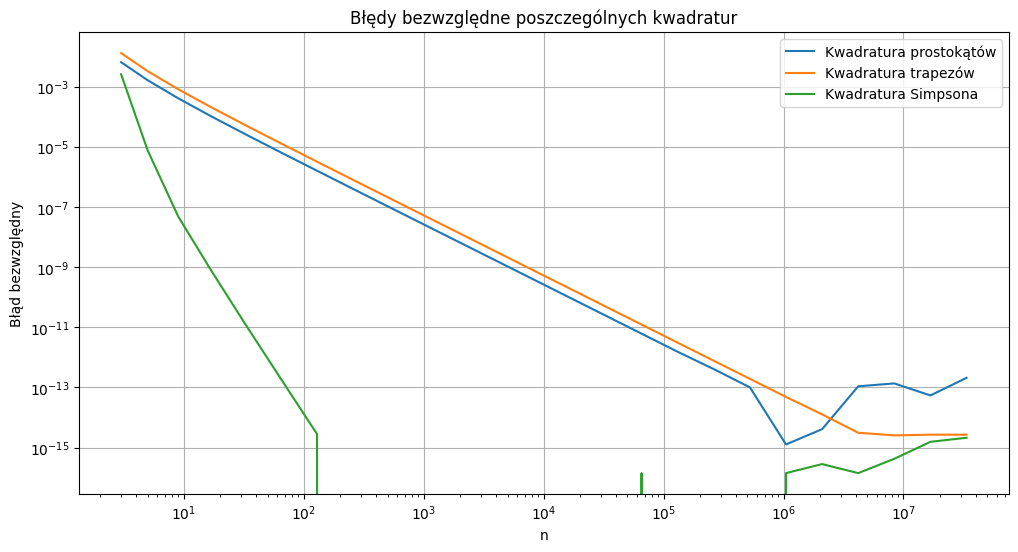

In [5]:
plt.figure(figsize=(12, 6))
plt.title("Błędy bezwzględne poszczególnych kwadratur")
plt.loglog(n_vec, quad_err, label="Kwadratura prostokątów")
plt.loglog(n_vec, trap_err, label="Kwadratura trapezów")
plt.loglog(n_vec, simps_err, label="Kwadratura Simpsona")
plt.xlabel('n')
plt.ylabel('Błąd bezwzględny')
plt.legend()
plt.grid(True)
plt.show()

*Wykres 1.* Bezwzględne wartości błędu względnego dla kwadratur prostokątów, trapezów oraz Simpsona w zależności od liczby ewaluacji funkcji podcałkowej.

Jak można zauważyć na powyższym wykresie, metoda prostokątów oraz trapezów osiągają niemal taki sam błąd względny niezależnie od liczby ewaluacji. Metoda Simpsona osiąga najmniejszy błąd, jednakże zarówno dla początkowej liczby punktów, jak i dla około $10^6$ punktów, błąd ten zaczyna być zbliżony do błędów metod prostokątów oraz trapezów. Warto również nadmienić, że dla metody Simpsona, można zauważyć efekt Rungego, gdzie dla około $n=10^6$ błąd przestaje być zerowy. 

Następnym krokiem było wyznaczenie takiej wartości skoku $h$ pomiędzy dwoma węzłami, dla których uzyskany błąd był najmniejszy. Otrzymane wartości znajdują się w poniższej tabeli 1.
| Metoda        | Wartość skoku $h$ |
|--------------|----------------|
| Prostokątów  | $9.54*10^{-7}$ | 
| Trapezów  | $1.19*10^{-7}$ | 
| Simpsona  | $3.89*10^{-3}$ | 

*Tabela 1.* Wartości skoku $h$ dla metod prostokątów, trapezów oraz Simpsona.

Tabela 1 pokazuje, że dla metody prostokątów oraz trapezów wartość $h$ jest bardzo podobna, co jest w pełni zgodne z wykresem 1, gdzie obie metody posiadały podobne wartości błędu. Wartość skoku dla metody Simpsona jest znacznie większa od dwóch poozstałych metod, co również znajduje potwierdzenie w wykresie 1. Dzięki temu, iż błąd tej metody bardzo szybko zbiega do zera pokazuje, że jest bardzo efektywna, a stosunkowo duża wartość skoku z najmniejszą różnicą umożliwia przy niewielkiej liczbie podziałó uzyskać bardzo dokładny wynik. Dodatkowo wartość $h$ dla metod prostokątów oraz trapezów jest zbliżona do $h_{min}$ wyznaczonego podczas pierwszego laboratorium, które wynosiło $h_{min} = 9.12*10^{-9}$.

In [6]:
quad_n_min = min((err, n) for n, err in zip(n_vec, quad_err))[1]
trap_n_min = min((err, n) for n, err in zip(n_vec, trap_err))[1]
simps_n_min = min((err, n) for n, err in zip(n_vec, simps_err))[1]

quad_h_min = width / quad_n_min
trap_h_min = width / trap_n_min
simps_h_min = width / simps_n_min

In [7]:
h_min_lab1 = 1e-8
h_min_lab1_theor = 9.1237e-9

In [8]:
p_quad_theor = 2
p_trap_theor = 2
p_simps_theor = 4

Na sam koniec tego zadania dla każdej z trzech metod wyznaczyliśmy empiryczny rząd zbieżności i porównaliśmy go z teoretycznym. Wartości te przedstawione są w tabeli 2, 3 oraz 4.

| $m$ | Rząd zbieżności    |
| ------ | ----------- |
| 1      | 2.70713116 |
| 2      | 2.35835570 |
| 3      | 2.17973831 |
| 4      | 2.09001374 |
| 5      | 2.04504475 |
| 6      | 2.02253213 |
| 7      | 2.01126855 |
| 8      | 2.00563490 |
| 9      | 2.00281761 |
| 10     | 2.00140892 |
| 11     | 2.00070495 |
| 12     | 2.00035093 |
| 13     | 2.00022152 |
| 14     | 2.00000756 |

*Tabela 2.* Empiryczny rząd zbieżności dla metody prostokątów.

| $m$ | Rząd zbieżności    |
| ------ | ----------- |
| 1      | 2.71044136 |
| 2      | 2.35842512 |
| 3      | 2.17974233 |
| 4      | 2.09001399 |
| 5      | 2.04504477 |
| 6      | 2.02253213 |
| 7      | 2.01126855 |
| 8      | 2.00563490 |
| 9      | 2.00281761 |
| 10     | 2.00140885 |
| 11     | 2.00070451 |
| 12     | 2.00035196 |
| 13     | 2.00017663 |
| 14     | 2.00008496 |

*Tabela 3.* Empiryczny rząd zbieżności dla metody trapezów.

| $m$ | Rząd zbieżności     |
| ------ | ----------- |
| 1      | 11.43238503 |
| 2      | 8.62345193  |
| 3      | 6.53687911  |
| 4      | 6.26986212  |
| 5      | 6.13548892  |

*Tabela 4.* Empiryczny rząd zbieżności dla metody Simpsona.

Jak widać na powyższych tabelach 2 oraz 3, empiryczny rząd zbieżności dla metd prostokątów oraz trapezów zbiega do 2, co jest zgodne z teoretycznym rzędem zbieżności. Wartość dla metody Simpsona wynosi około 6, co nie jest zgodne z teoretyczną wartością.

In [9]:
num_errs = n_vec * np.finfo(np.float64).eps * 2

def order_of_convergence(errs):
    return [(k + 1, np.log(errs[k + 1] / errs[k]) / np.log(h_vec[k + 1] / h_vec[k])) for k in range(len(errs) - 1) if errs[k] > num_errs[k] and errs[k + 1] > num_errs[k + 1]]

p_quad = order_of_convergence(quad_err)
p_trap = order_of_convergence(trap_err)
p_simps = order_of_convergence(simps_err)

## ZADANIE 2
W tym zadaniu mieliśmy wyznaczyć wartość całki $\int_{0}^{1}\frac{4}{1+x^{2}}$ oraz bezwzględną wartość błędu względnego w zależności od liczby ewaluacji funkcji podcałkowej przy użyciu kwadratury Gaussa-Legendre'a. W tym celu wykorzystaliśmy funkcję $\texttt{np.polynomial.legendre.leggauss(n)}$, która zwraca punkty oraz wagi dla tej kwadratury n-tego stopnia. Potem każdy punkt pomnożyliśmy $*0.5$ oraz dodaliśmy $0.5$, aby wszystkie punkty znajdowały się w przedziale $[0, 1]$ (granice całkowania). Następnie obliczyliśmy całki oraz wyznaczliśmy błędy względne dla poszczególnej liczby punktów. Przedział dzieliliśmy na $2^m + 1$ węzłów, gdzie $m=1..14$, ponieważ dla większych wartości algorytm wykonywał się długo. Otrzymane wyniki przedstawiliśmy na poniższym wykresie 2.

In [10]:
m_vec_gauss = np.arange(1, 14)
n_vec_gauss = 2**m_vec_gauss + 1
leggaus_vals = [np.polynomial.legendre.leggauss(m) for m in n_vec_gauss]
x_vec_gauss = [x_vec * 0.5 + 0.5 for (x_vec, _) in leggaus_vals]
w_vec_gauss = [y for (_, y) in leggaus_vals]
vals_gauss = np.array([np.sum(f(x) * 0.5 * w) for (x, w) in zip(x_vec_gauss, w_vec_gauss)])
gaus_err = np.abs((vals_gauss - real_integral_val) / real_integral_val)

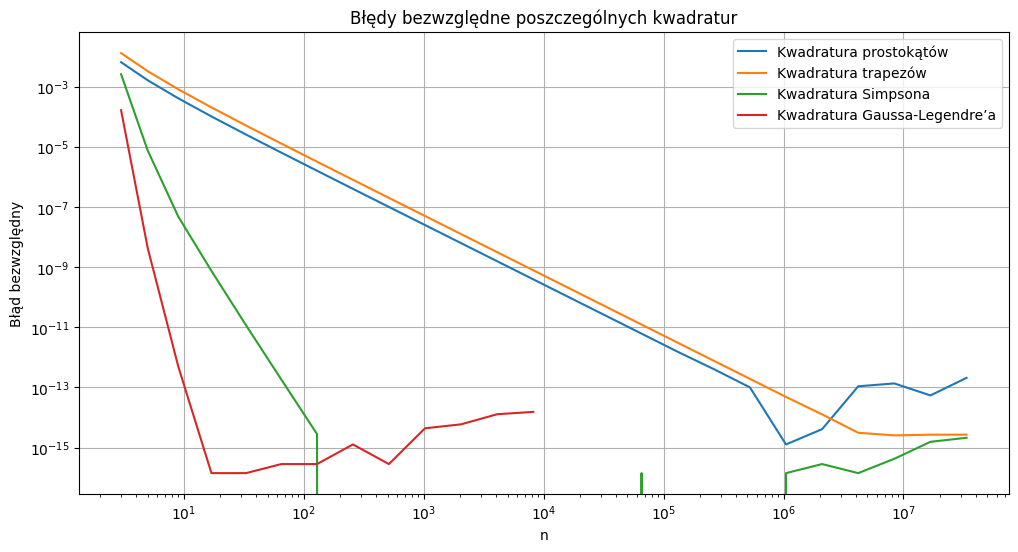

In [11]:
plt.figure(figsize=(12, 6))
plt.title("Błędy bezwzględne poszczególnych kwadratur")
plt.loglog(n_vec, quad_err, label="Kwadratura prostokątów")
plt.loglog(n_vec, trap_err, label="Kwadratura trapezów")
plt.loglog(n_vec, simps_err, label="Kwadratura Simpsona")
plt.loglog(n_vec_gauss, gaus_err, label="Kwadratura Gaussa-Legendre’a")
plt.xlabel('n')
plt.ylabel('Błąd bezwzględny')
plt.legend()
plt.grid(True)
plt.show()

*Wykres 2.* Bezwzględne wartości błędu względnego dla kwadratury prostokątów, trapezów, Simpsona oraz Gaussa-Legendre'a w zależności od liczby ewaluacji funkcji podcałkowej.

Analizując powyższy wykres 2 można zauważyć, że metoda Gaussa-Legendre'a osiąga najmniejszy błąd względny ze wszystkich sprawdzanych metod. Widać jednak, że jest ona podatna na efekt Rungego, co można zauważyć dla około powyżej $n=10^{2}$, gdzie wartości błędów są wyższe niż wcześniej oraz dodatkowo większe niż dla metody Simpsona.